In [1]:
import glob
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update({'font.size': 20})

# Experimental Results

## States and Symbols

In [3]:
exp_data = []

for fp in glob.glob("./experiments/states_symbols/*.json"):
    with open(fp) as f:
        exp_data.append(json.load(f))

In [4]:
# Sort the experiment data by states and then symbols
exp_data = sorted(
    exp_data,
    key=lambda k: (k["params"]["states"], k["params"]["symbols"])
)

In [5]:
# Convert experiment data to format to be displayed as boxplots
data = {}
for exp in exp_data:
    params = exp["params"]
    label = (params["states"], params["symbols"])
    label_data = []
    
    for i in range(10):
        label_data.append({
            "best_l2": exp["best_l2s"][i] / params["states"],
            "rand_l2": exp["rand_l2s"][i] / params["states"],
        })
    
    data[label] = pd.DataFrame(label_data)

,best_l2,rand_l2
0,0.706821,0.947285
1,0.878772,1.182006
2,0.781747,1.036343
3,0.786115,0.901591
4,0.776197,0.961355
5,0.850822,0.998053
6,0.640194,0.932536
7,0.889195,1.028908
8,0.692731,0.983912
9,0.783371,0.986742


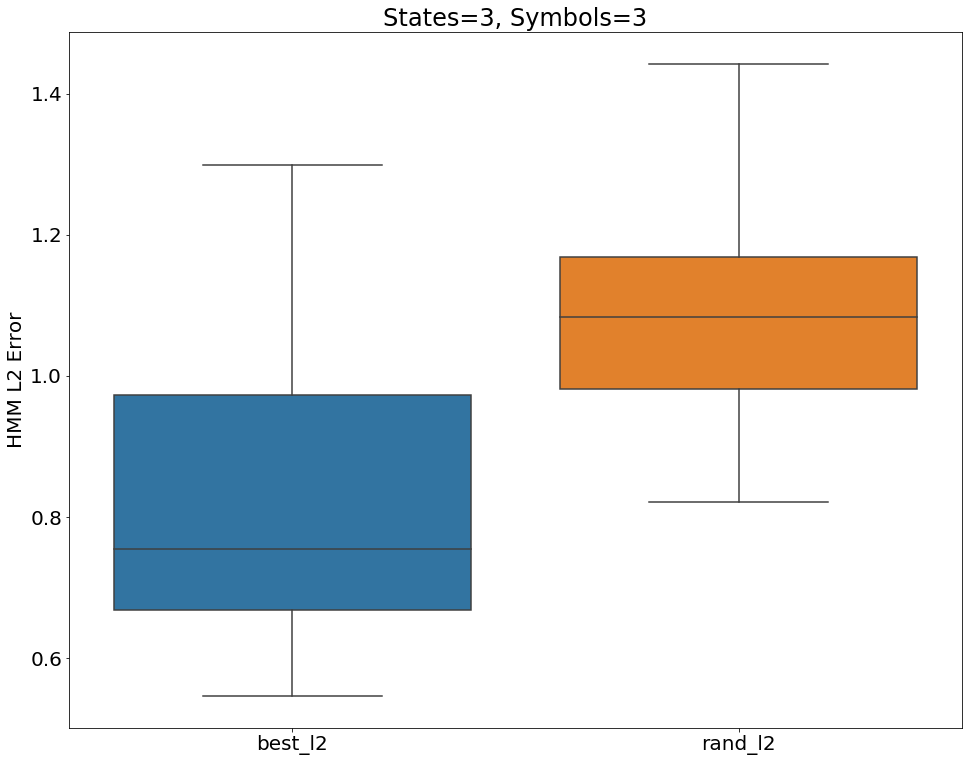

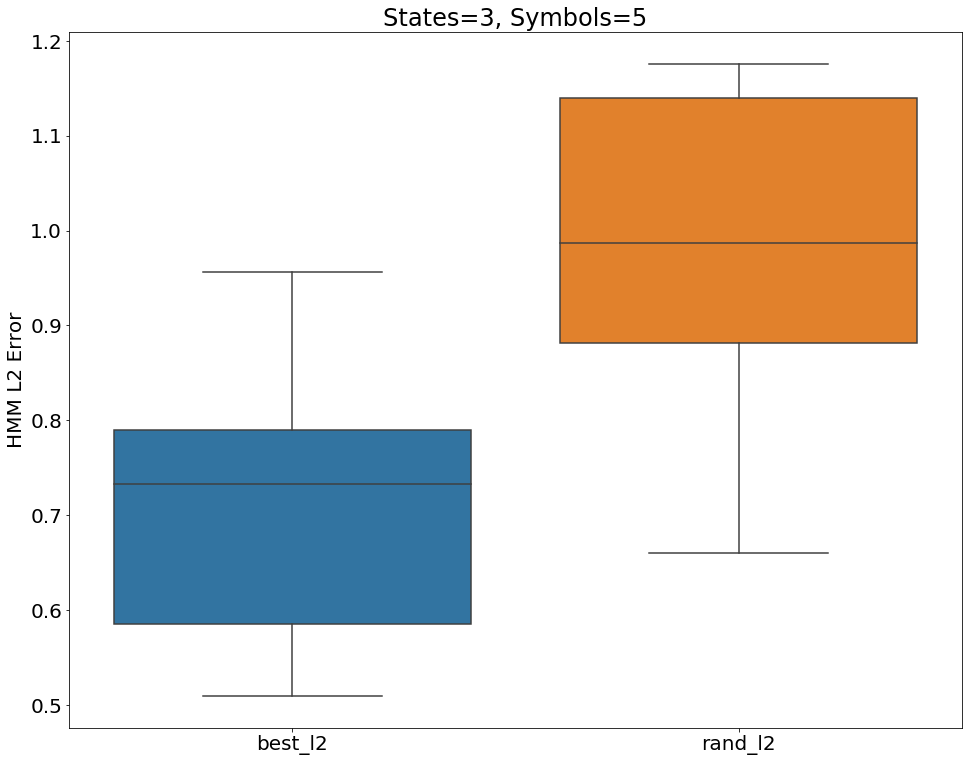

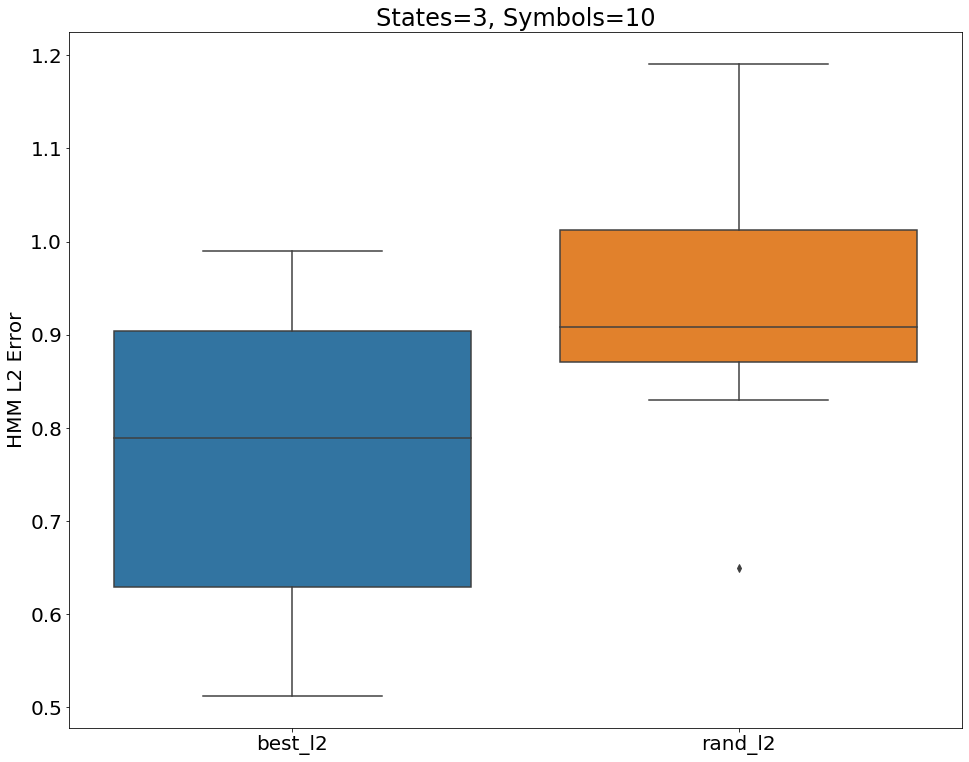

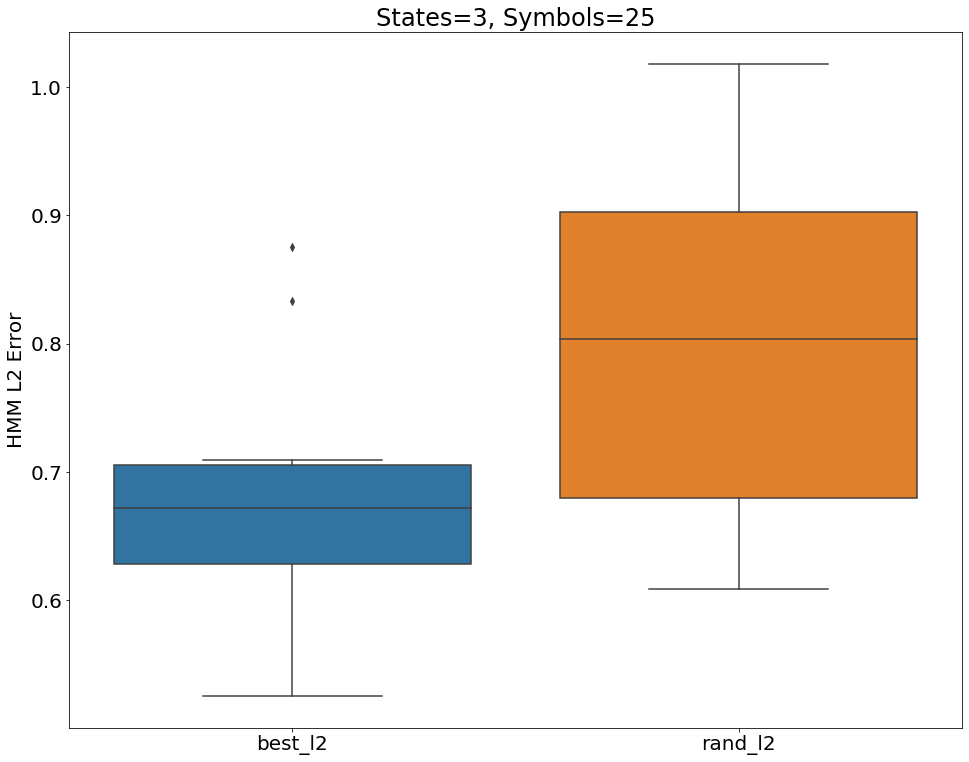

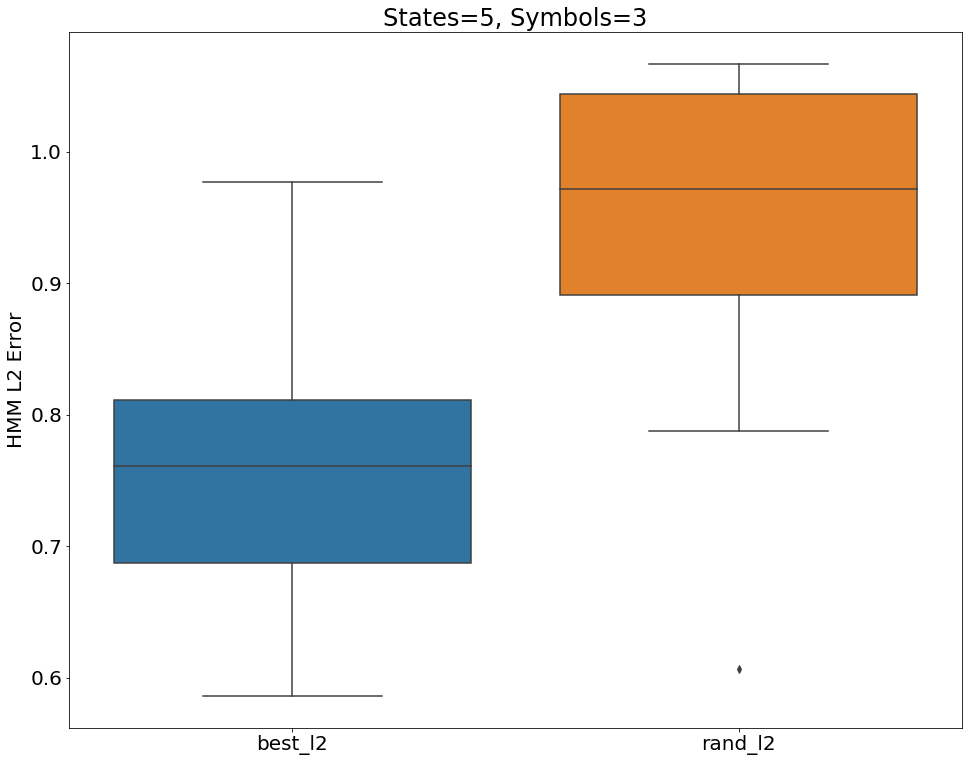

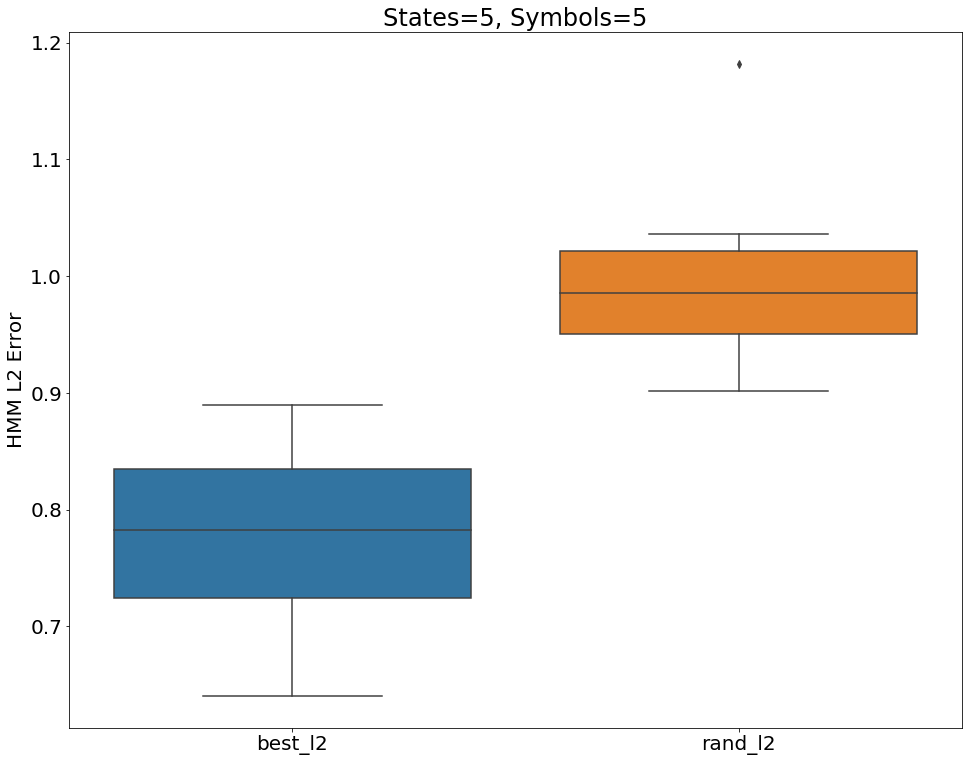

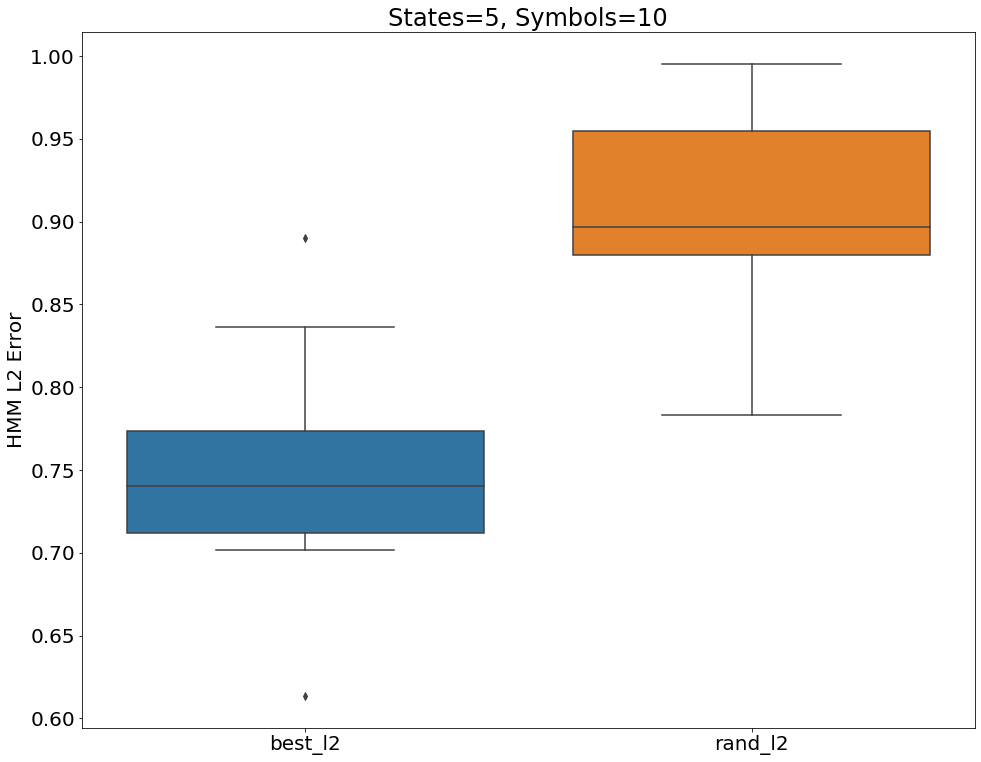

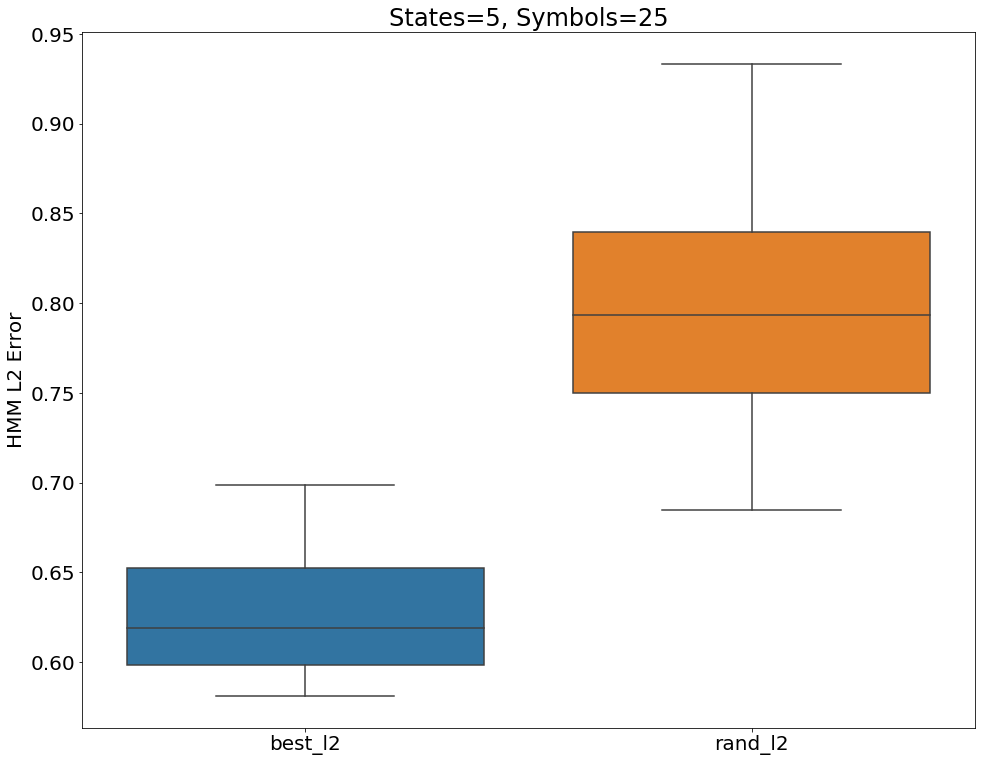

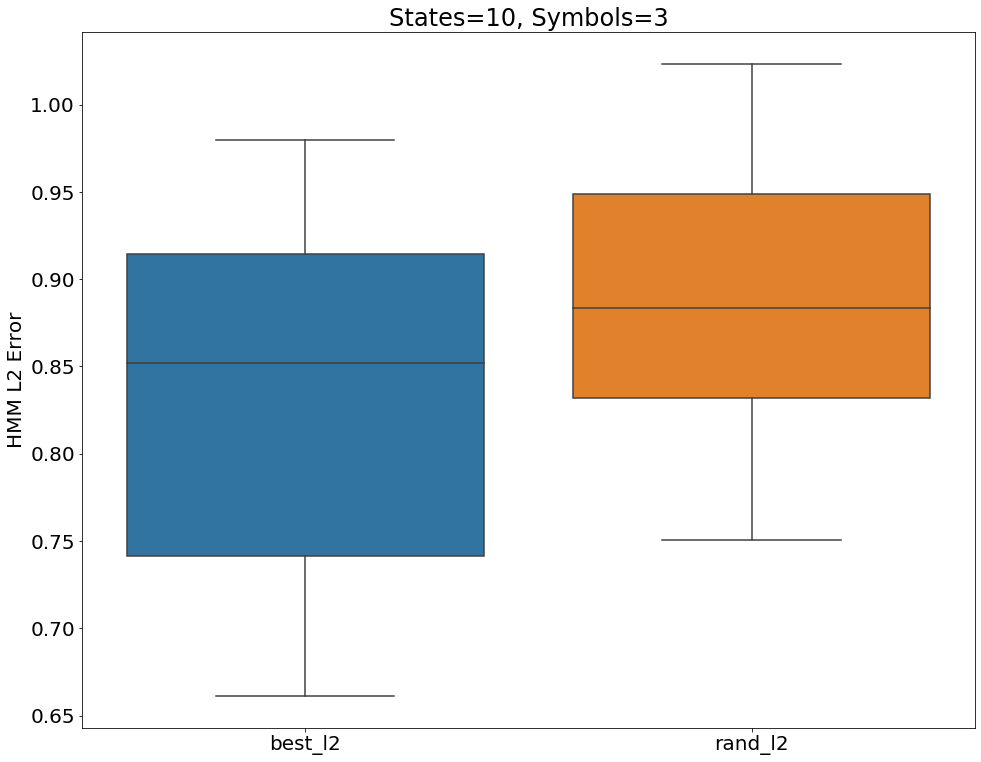

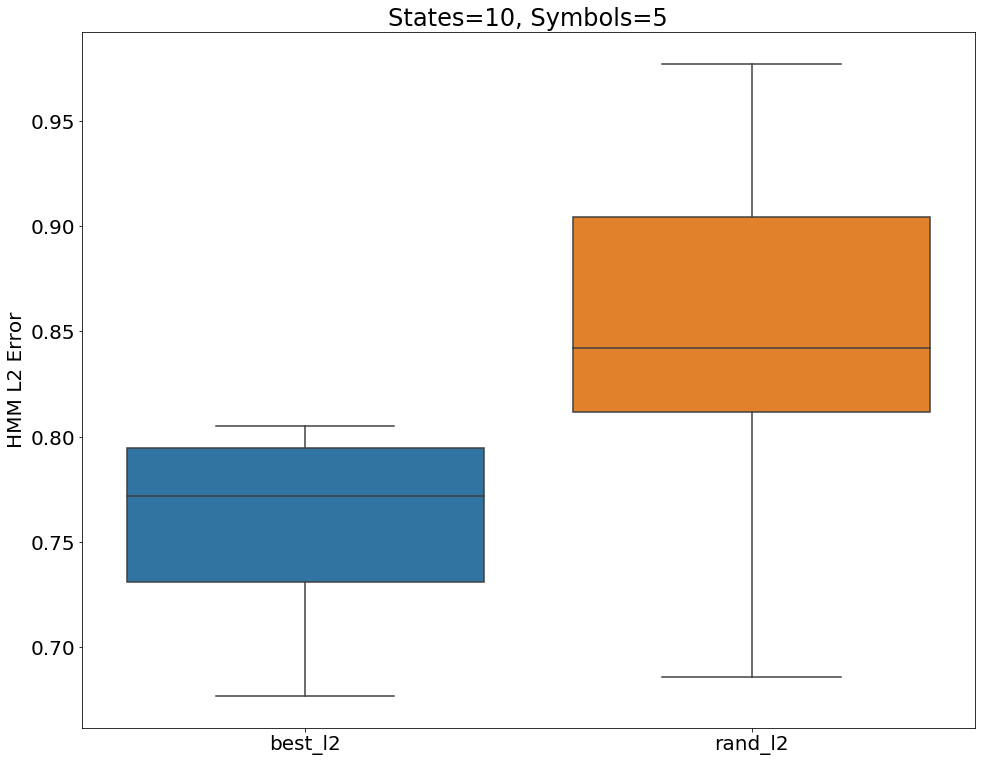

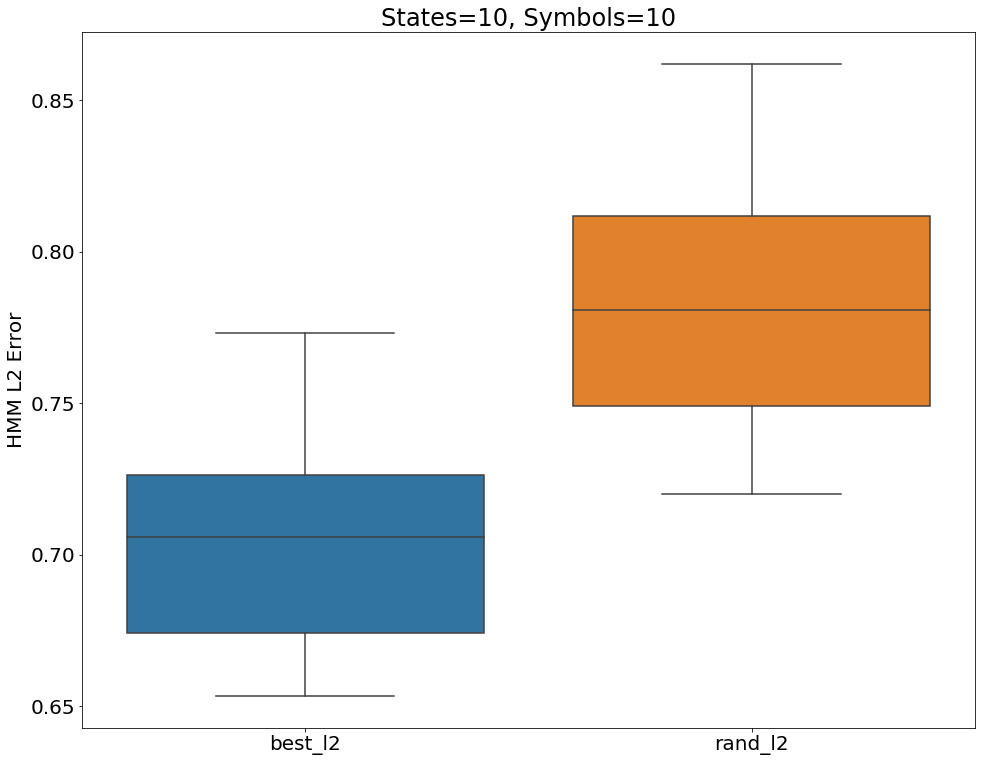

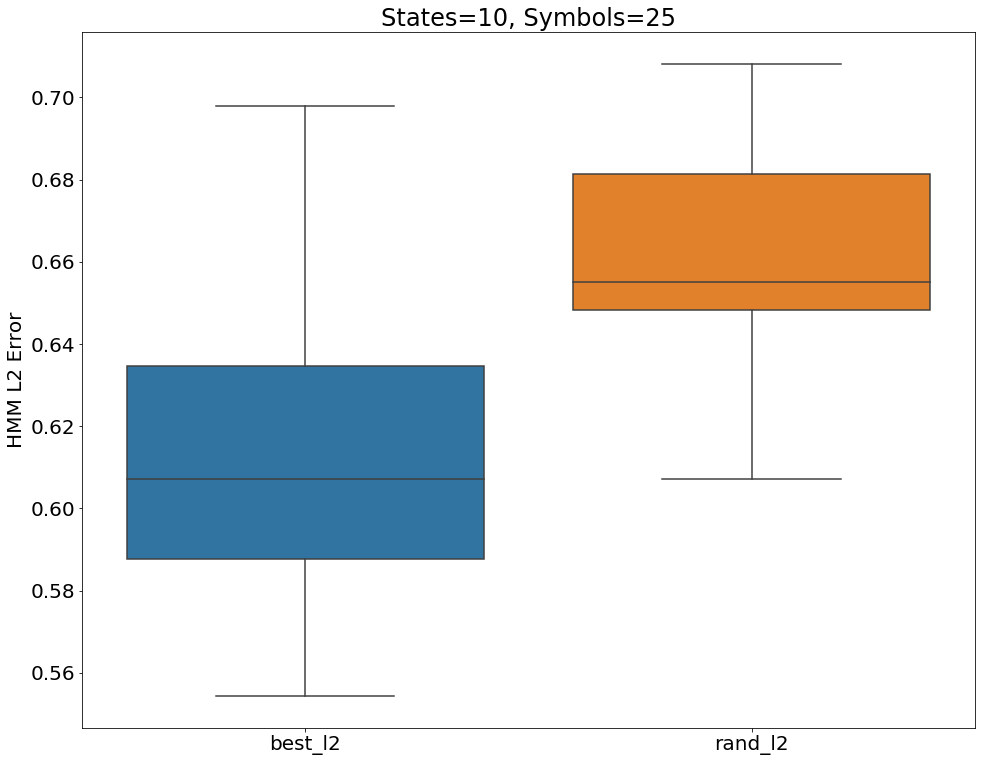

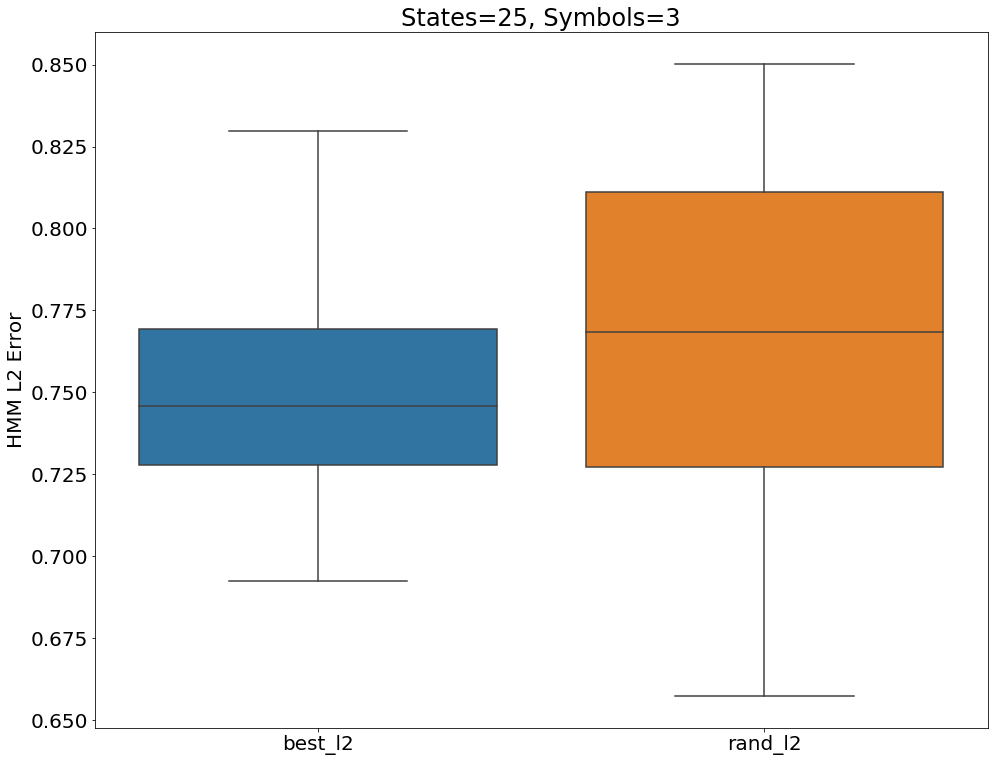

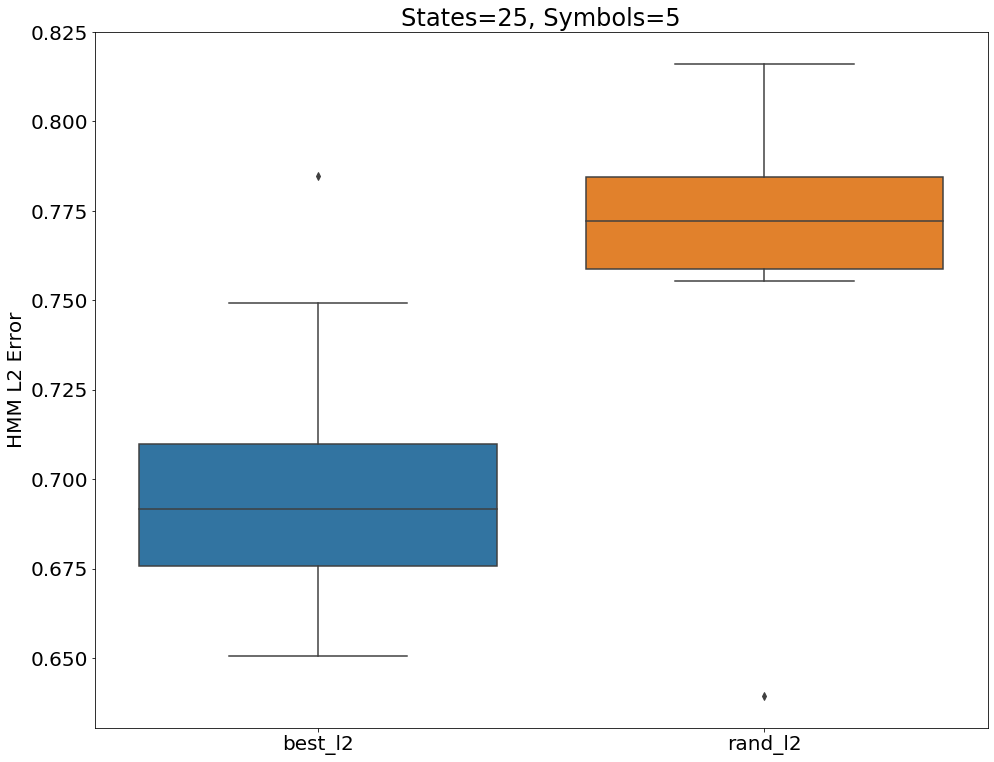

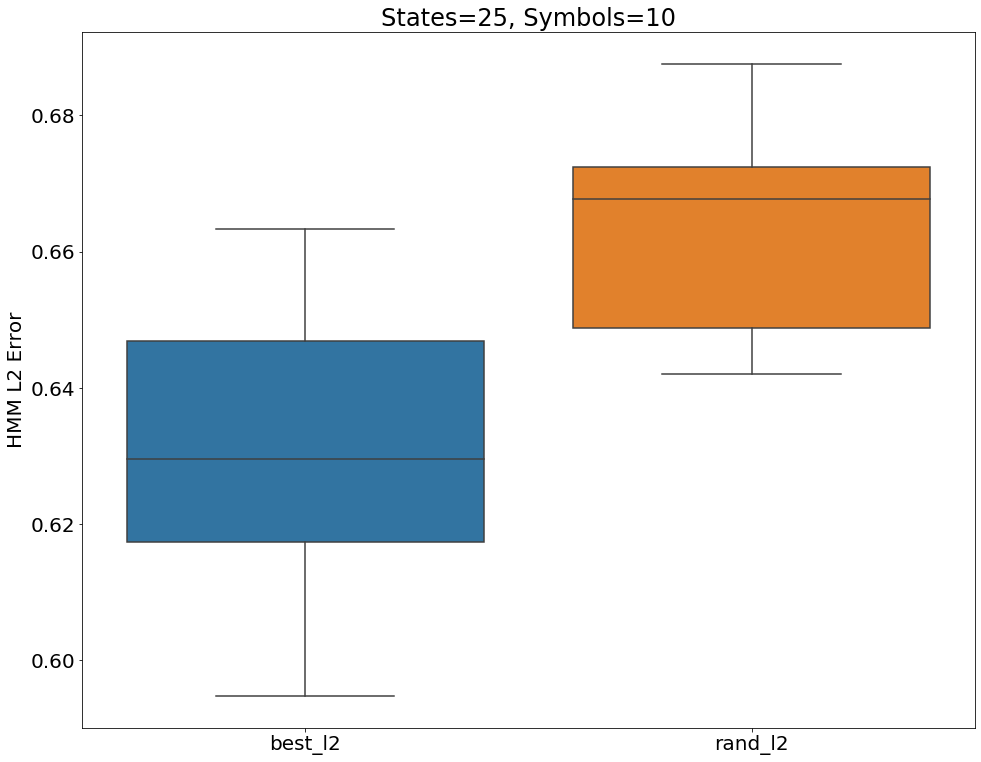

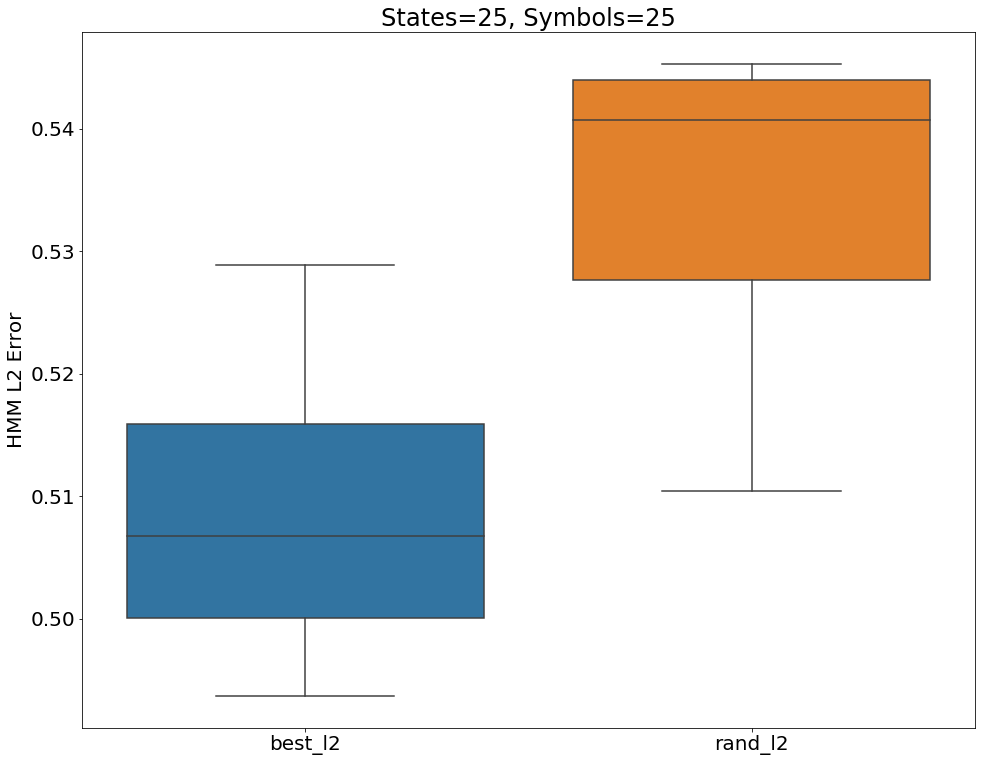

In [6]:
for k, v in data.items():
    title = f"States={k[0]}, Symbols={k[1]}"
    
    plt.figure(figsize=(16, 12.8))
    ax = sns.boxplot(data=v)
    ax.set(title=title, ylabel="HMM L2 Error")

In [7]:
# Convert experiment data to format to be displayed as boxplots
data = []
for exp in exp_data:
    params = exp["params"]
    label = (params["states"], params["symbols"])
    
    for i in range(10):
        data.append({
            "label": label,
            "model": "best_l2",
            "loss": exp["best_l2s"][i] / params["states"],
        })
        data.append({
            "label": label,
            "model": "rand_l2",
            "loss": exp["rand_l2s"][i] / params["states"],
        })
    
#     data[label] = pd.DataFrame(label_data)

# data[(5, 5)]
df = pd.DataFrame(data)

df

,label,model,loss
0,"(3, 3)",best_l2,0.836469
1,"(3, 3)",rand_l2,1.275172
2,"(3, 3)",best_l2,1.298283
3,"(3, 3)",rand_l2,1.179988
4,"(3, 3)",best_l2,0.545715
...,...,...,...
315,"(25, 25)",rand_l2,0.542919
316,"(25, 25)",best_l2,0.516905
317,"(25, 25)",rand_l2,0.544126
318,"(25, 25)",best_l2,0.493670


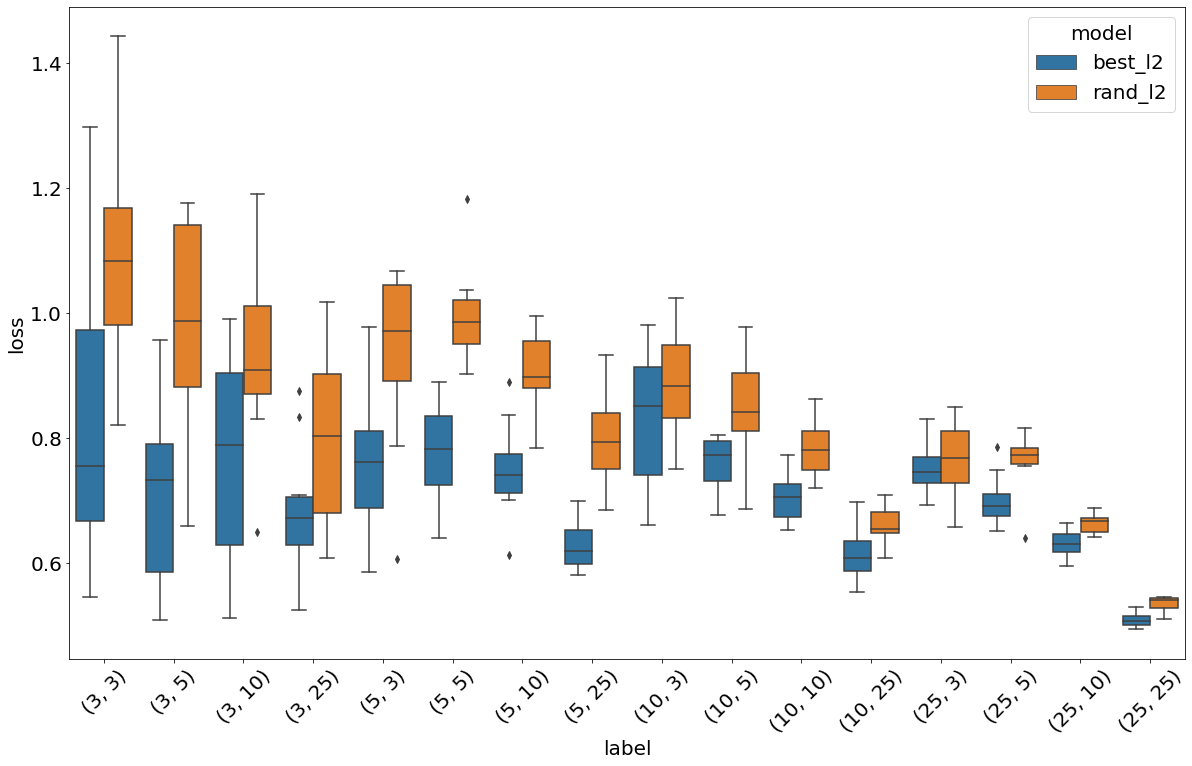

In [8]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)

ax = sns.boxplot(
    x="label",
    y="loss",
    hue="model",
    data=df
)

In [9]:
mean_losses = []

for exp in exp_data:
    params = exp["params"]
    label = (params["states"], params["symbols"])
    
    mean_losses.append({
        "label": label,
        "model": "best_l2",
        "mean_loss": np.mean(exp["best_l2s"]) / params["states"],
    })
    
    mean_losses.append({
        "label": label,
        "model": "rand_l2",
        "mean_loss": np.mean(exp["rand_l2s"]) / params["states"],
    })
    
df = pd.DataFrame(mean_losses)
df

,label,model,mean_loss
0,"(3, 3)",best_l2,0.822870
1,"(3, 3)",rand_l2,1.087303
2,"(3, 5)",best_l2,0.708228
3,"(3, 5)",rand_l2,0.968318
4,"(3, 10)",best_l2,0.766471
5,"(3, 10)",rand_l2,0.935887
6,"(3, 25)",best_l2,0.678991
7,"(3, 25)",rand_l2,0.798989
8,"(5, 3)",best_l2,0.767200
9,"(5, 3)",rand_l2,0.935685


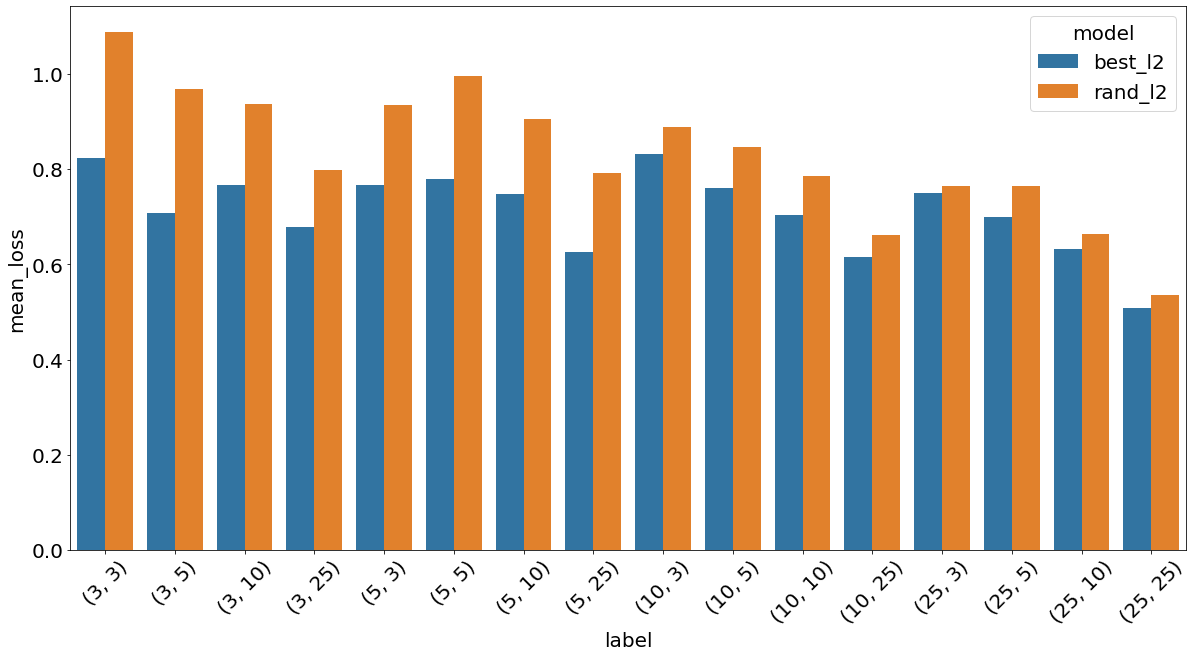

In [10]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)

sns.barplot(
    x="label",
    y="mean_loss",
    hue="model",
    data=df,
)

## Mutation Rate

In [14]:
exp_data = []

for fp in glob.glob("./experiments/mut_rate/*.json"):
    with open(fp) as f:
        exp_data.append(json.load(f))
exp_data

[{'params': {'states': 3,
   'symbols': 5,
   'epochs': 10,
   'epoch_size': 500,
   'batch_size': 200,
   'seq_len': 20,
   'pop_size': 25,
   'gens': 30,
   'offspring_prop': 1.0,
   'cx_prob': 0.0,
   'mut_prob': 1.0,
   'mut_rate': 0.4,
   '_pool_size': 4},
  'mean_fitnesses': [[0.8566910147666931,
    0.8163999986648559,
    0.754199993610382,
    0.7290000057220459,
    0.7234000039100646,
    0.6987999999523162,
    0.6738000059127808,
    0.6515999960899354,
    0.6405999970436096,
    0.638600001335144,
    0.6175999999046325,
    0.6153999996185303,
    0.6523999905586243,
    0.6389999985694885,
    0.6368000054359436,
    0.6269999957084655,
    0.6533999943733215,
    0.656399998664856,
    0.643199999332428,
    0.6381999897956848,
    0.5618000006675721,
    0.5899999952316284,
    0.5811999988555908,
    0.5866000008583069,
    0.5959999966621399,
    0.600400002002716,
    0.5938000059127808,
    0.6103999996185303,
    0.596800000667572,
    0.5805999898910522,
    0.

In [21]:
# Sort the experiment data by mutation rate
exp_data_none = [e for e in exp_data if e["params"]["mut_rate"] is None]
exp_data_not_none = [e for e in exp_data if e["params"]["mut_rate"] is not None]

exp_data = exp_data_none + sorted(exp_data_not_none, key=lambda k: k["params"]["mut_rate"])

[{'params': {'states': 3,
   'symbols': 5,
   'epochs': 10,
   'epoch_size': 500,
   'batch_size': 200,
   'seq_len': 20,
   'pop_size': 25,
   'gens': 30,
   'offspring_prop': 1.0,
   'cx_prob': 0.0,
   'mut_prob': 1.0,
   'mut_rate': None,
   '_pool_size': 4},
  'mean_fitnesses': [[0.8564363288879394,
    0.8311999940872192,
    0.8070000052452088,
    0.7296000027656555,
    0.7117999958992004,
    0.6921999979019166,
    0.6615999960899352,
    0.672400004863739,
    0.6644000029563903,
    0.6502000045776367,
    0.6472000074386597,
    0.6408000063896179,
    0.6431999969482421,
    0.6192000031471252,
    0.6092000079154968,
    0.611599998474121,
    0.5921999979019165,
    0.5902000021934509,
    0.5996000075340271,
    0.5739999961853027,
    0.5694000029563904,
    0.5683999979496002,
    0.5904000043869019,
    0.5664000105857849,
    0.5805999946594238,
    0.5641999995708465,
    0.5561999988555908,
    0.5729999995231628,
    0.5947999954223633,
    0.56200000166893,
   

In [29]:
# Convert experiment data to format to be displayed as boxplots
data = []
for exp in exp_data:
    mut_rate = exp["params"]["mut_rate"]
    label = "1/N" if mut_rate is None else mut_rate
    
    for i in range(10):
        data.append({
            "mut_rate": label,
            "model": "best_l2",
            "loss": exp["best_l2s"][i] / exp["params"]["states"],
        })
        data.append({
            "mut_rate": label,
            "model": "rand_l2",
            "loss": exp["rand_l2s"][i] / exp["params"]["states"],
        })
    
#     data[label] = pd.DataFrame(label_data)

# data[(5, 5)]
df = pd.DataFrame(data)

df

,mut_rate,model,loss
0,1/N,best_l2,0.472006
1,1/N,rand_l2,0.950350
2,1/N,best_l2,0.639028
3,1/N,rand_l2,0.736869
4,1/N,best_l2,1.039692
...,...,...,...
95,0.8,rand_l2,1.001011
96,0.8,best_l2,0.942143
97,0.8,rand_l2,1.064257
98,0.8,best_l2,0.836610


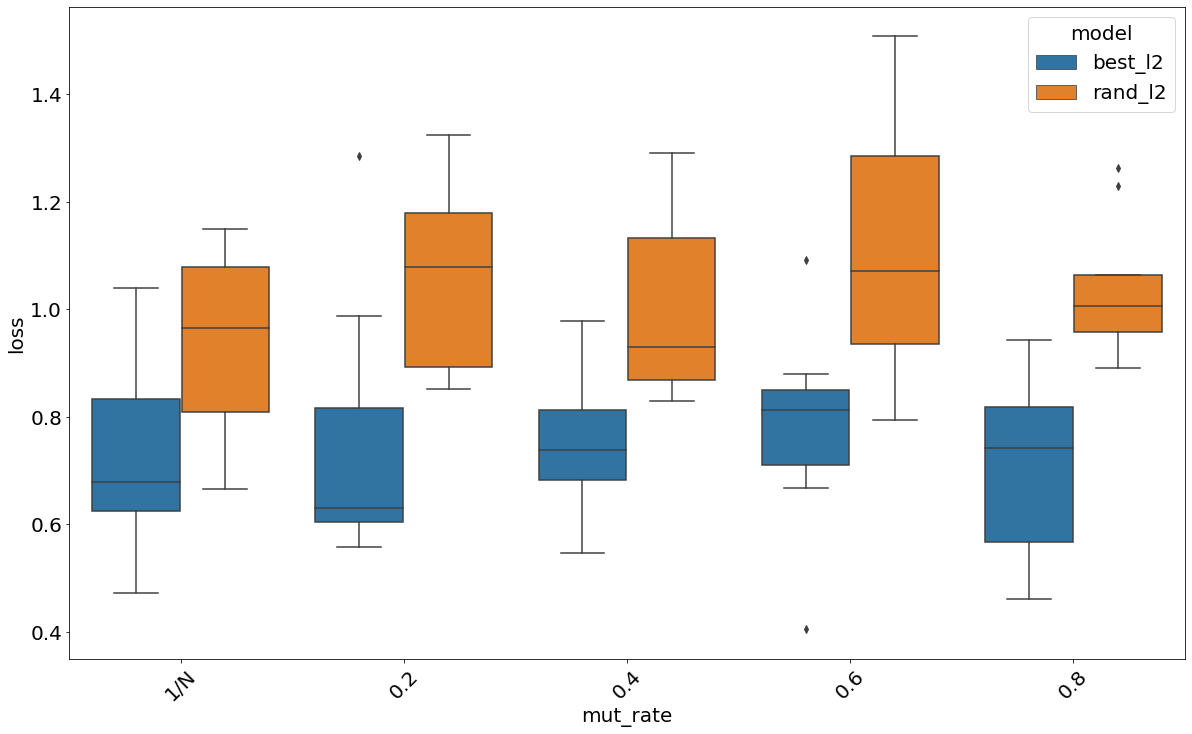

In [30]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)

ax = sns.boxplot(
    x="mut_rate",
    y="loss",
    hue="model",
    data=df
)